# Project: Flight Price Analysis

This project focuses on analyzing flight data to explore trends and relationships between different variables such as airlines, flight class, stops, and prices. The goal is to perform basic data cleaning, exploratory data analysis (EDA), and potentially build predictive models.

## Data Source:
The dataset used in this project is a CSV file (`clean_dataset.csv`), which contains the following information:
- **Airline**: The airline operating the flight.
- **Flight**: The flight code.
- **Source City**: The city where the flight departs from.
- **Departure Time**: Time of departure (categorized).
- **Stops**: Number of stops (zero, one, etc.).
- **Arrival Time**: Time of arrival (categorized).
- **Destination City**: The city where the flight arrives.
- **Class**: Travel class (Economy, Business).
- **Duration**: The duration of the flight in hours.
- **Days Left**: Number of days left until the departure date.
- **Price**: The price of the flight ticket (in Indian Rupees).



## Installation

Install the required packages by running the following command:
   ```bash
   pip install pandas
   ```

In [145]:
import pandas as pd

In [146]:
df = pd.read_csv('data/clean_dataset.csv')
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## Basic Exploratory Data Analysis

In [147]:
df.shape

(300153, 12)

In [148]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [150]:
df = df.rename(columns={"source_city": "origin"})
df.head()

,Unnamed: 0,airline,flight,origin,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [151]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [152]:
df["origin"].value_counts()

origin
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [153]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [154]:
df["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [155]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64


### Obtaining max, min, mean and median for the duration column

In [156]:
df["duration"].agg(["min", "max", "mean", "median"])

min        0.830000
max       49.830000
mean      12.221021
median    11.250000
Name: duration, dtype: float64

Changing the currency to USD instead of RUP to get a better sense of how expensive or cheap a flight is

In [157]:
def rupees_to_usd(rupees: int) -> int:
    return math.floor(rupees * 0.012)

df["price"] = df["price"].apply(rupees_to_usd)
df

,Unnamed: 0,airline,flight,origin,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,831
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,925
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,949
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,979


In [177]:
df["price"].agg(["min", "max", "mean", "median"])

min         13.00000
max       1476.00000
mean       250.18989
median      89.00000
Name: price, dtype: float64

## Data Preprocess

Removing not needed columns

In [158]:
df = df.drop(['Unnamed: 0', 'flight'], axis=1)

Changing class column values

In [159]:
def change_class_column_values(column: str):
    return 1 if column == 'Business' else 0

df["class"] = df["class"].apply(change_class_column_values)
df.head()

,airline,origin,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,71
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,71
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,71
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,71
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,71


Factorizing stops column values

In [160]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [161]:
df["stops"] = pd.factorize(df['stops'])[0]

In [162]:
df

,airline,origin,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,71
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,71
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,71
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,71
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,71
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,831
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,925
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,949
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,979


### Hot-encoding airline column

New dataframe which each column is the value of an airline and it'll show True if said row corresponds to the said airline.

In [163]:
airline_encoded = pd.get_dummies(df['airline'], prefix='airline')
airline_encoded.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True


Joining the above DF and dropping the airline column from the original DF

In [164]:
df = df.join(airline_encoded).drop(['airline'], axis=1)
df

,origin,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,71,False,False,False,False,True,False
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,71,False,False,False,False,True,False
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,71,True,False,False,False,False,False
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,71,False,False,False,False,False,True
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,71,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,831,False,False,False,False,False,True
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,925,False,False,False,False,False,True
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,949,False,False,False,False,False,True
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,979,False,False,False,False,False,True


Hot-Encoding the remaining columns since each value count was low. Doing all of them in one-liner

In [165]:
df = df.join(pd.get_dummies(df['origin'], prefix='origin')).drop(['origin'], axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='destination_city')).drop(['destination_city'], axis=1)
df = df.join(pd.get_dummies(df['arrival_time'], prefix='arrival_time')).drop(['arrival_time'], axis=1)
df = df.join(pd.get_dummies(df['departure_time'], prefix='departure_time')).drop(['departure_time'], axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,71,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,71,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,71,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,71,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,71,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,831,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,925,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,949,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,979,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Train Regression Model

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [167]:
X, y = df.drop(columns=['price']), df['price']

In [168]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,False,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


### Our target variable is price since we would like to predcit the price of the flights

In [169]:
y

0          71
1          71
2          71
3          71
4          71
         ... 
300148    831
300149    925
300150    949
300151    979
300152    979
Name: price, Length: 300153, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

In [172]:
reg.score(X_test, y_test)

0.9854954245395107

In [173]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

### Summary of Metrics:
- R-squared Value: How well the model fits the data (higher is better).
 - Mean Absolute Error (MAE): The average absolute error in predictions.
 - Mean Squared Error (MSE): The average squared error in predictions.
- Root Mean Squared Error (RMSE): The square root of the MSE, giving an error metric in the same unit as the target variable.

In [180]:
y_pred = reg.predict(X_test)
print("R Squared Value: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R Squared Value:  0.9854954245395107
MAE:  12.672719229720729
MSE:  1065.435730533669
RMSE:  32.64101301328849


In [175]:
import matplotlib.pyplot as plt

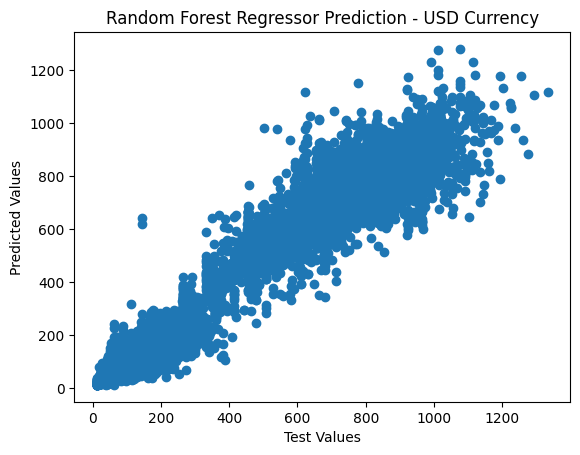

In [179]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Prediction - USD Currency')
plt.show()

## Conclusion
As we can see on the graphic above our model performs relatively good with the data. However if the R-squared value is low or the error metrics are relatively high, this may suggest opportunities for improvement.

Potential next steps include exploring more advanced models (e.g., decision trees, random forests, or boosting techniques), feature engineering, or hyperparameter tuning to improve accuracy.